# Doctor's Consultation Fees Prediction

Problem Statement:
We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Loading the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Uploading the the data set
data_train =pd.read_csv('Final_Train-Fee.csv')
data_test=pd.read_csv('Final_Test-Fee.csv')

In [3]:
ds=pd.DataFrame(data=data_train)
dsTest=pd.DataFrame(data=data_test)
ds

Qualification           Experience Rating  \
0              BHMS, MD - Homeopathy  24 years experience   100%   
1       BAMS, MD - Ayurveda Medicine  12 years experience    98%   
2     MBBS, MS - Otorhinolaryngology   9 years experience    NaN   
3                BSc - Zoology, BAMS  12 years experience    NaN   
4                               BAMS  20 years experience   100%   
...                              ...                  ...    ...   
5956                  MBBS, MS - ENT  19 years experience    98%   
5957                            MBBS  33 years experience    NaN   
5958                            MBBS  41 years experience    97%   
5959     MBBS, MD - General Medicine  15 years experience    90%   
5960         BDS, MDS - Orthodontics  17 years experience   100%   

                              Place           Profile  \
0               Kakkanad, Ernakulam         Homeopath   
1             Whitefield, Bangalore          Ayurveda   
2        Mathikere - BEL, Bangalore    ENT Specialist   
3      Bannerghatta Road, Bangalore          Ayurveda   
4             Keelkattalai, Chennai          Ayurveda   
...                             ...               ...   
5956        Basavanagudi, Bangalore    ENT Specialist   
5957          Nungambakkam, Chennai  General Medicine   
5958  Greater Kailash Part 2, Delhi  General Medicine   
5959         Vileparle West, Mumbai  General Medicine   
5960               Pitampura, Delhi           Dentist   

                                     Miscellaneous_Info  Fees  
0                  100% 16 Feedback Kakkanad, Ernakulam   100  
1                 98% 76 Feedback Whitefield, Bangalore   350  
2                                                   NaN   300  
3     Bannerghatta Road, Bangalore ₹250 Available on...   250  
4                 100% 4 Feedback Keelkattalai, Chennai   250  
...                                                 ...   ...  
5956            98% 45 Feedback Basavanagudi, Bangalore   300  
5957                                                NaN   100  
5958      97% 11 Feedback Greater Kailash Part 2, Delhi   600  
5959  General Medical Consultation Viral Fever Treat...   100  
5960  Acrylic Partial Denture Crowns and Bridges Fix...   200  

[5961 rows x 7 columns]

# EDA

In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


There are 5961 rows and 7 columns. Except Fees all are object type varibale. Target varibale is continous and interger type.

In [5]:
dsTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


Test Data has 1987 rows and 6 columns. All are Object type columns.

In [6]:
# Checking missing values
ds.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Almost half of the values are missing in Rating and Miscellaneous_Info varibles each. There are very few missing values in Place column.

<AxesSubplot:>

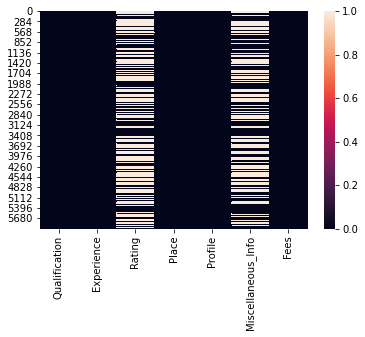

In [7]:
sns.heatmap(ds.isnull())

The heat map Shows, most of the mssing values are from Rating and Miscellaneous_Info varibles.

In [8]:
# Checking missing values in test data
dsTest.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

The Test data also has mssing values in the same variables as in Train Data.

Since our data raw and messed up. First lets make it bit meanigfull before we do visualization.

In [9]:
# Extract Experience Year from Experience variable in numeric form
ds['Experience'] = ds['Experience'].str.split().str[0]
ds['Experience'] = ds['Experience'].astype(int)

In [10]:
ds.head(5)

Qualification  Experience Rating  \
0           BHMS, MD - Homeopathy          24   100%   
1    BAMS, MD - Ayurveda Medicine          12    98%   
2  MBBS, MS - Otorhinolaryngology           9    NaN   
3             BSc - Zoology, BAMS          12    NaN   
4                            BAMS          20   100%   

                          Place         Profile  \
0           Kakkanad, Ernakulam       Homeopath   
1         Whitefield, Bangalore        Ayurveda   
2    Mathikere - BEL, Bangalore  ENT Specialist   
3  Bannerghatta Road, Bangalore        Ayurveda   
4         Keelkattalai, Chennai        Ayurveda   

                                  Miscellaneous_Info  Fees  
0               100% 16 Feedback Kakkanad, Ernakulam   100  
1              98% 76 Feedback Whitefield, Bangalore   350  
2                                                NaN   300  
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  
4              100% 4 Feedback Keelkattalai, Chennai   250

In [11]:
# We can extract City and locality from the Place column
# Before extracting lets first treat the msiing values in Place column
ds.Place.fillna('Undefine,Undefine',inplace=True)

# Extracting city and location from Place
ds['locality'] = ds['Place'].str.split(",").str[0]
ds['city'] = ds['Place'].str.split(",").str[1]

#Now we can drop the place variable
ds.drop('Place',axis=1,inplace=True)

In [12]:
# Handling Rating Column 
# Rating column has almost 50%  missing values , so first lets treat the missing values with -99999%
ds['Rating'].fillna('-99999%',inplace=True)

# replacing % into numerical values
for i in ds['Rating'].value_counts().index:
     ds['Rating'].replace(i,int(i[:-1]),inplace=True)
    

In [13]:
ds.head(5)

Qualification  Experience  Rating         Profile  \
0           BHMS, MD - Homeopathy          24     100       Homeopath   
1    BAMS, MD - Ayurveda Medicine          12      98        Ayurveda   
2  MBBS, MS - Otorhinolaryngology           9  -99999  ENT Specialist   
3             BSc - Zoology, BAMS          12  -99999        Ayurveda   
4                            BAMS          20     100        Ayurveda   

                                  Miscellaneous_Info  Fees           locality  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           Kakkanad   
1              98% 76 Feedback Whitefield, Bangalore   350         Whitefield   
2                                                NaN   300    Mathikere - BEL   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  Bannerghatta Road   
4              100% 4 Feedback Keelkattalai, Chennai   250       Keelkattalai   

         city  
0   Ernakulam  
1   Bangalore  
2   Bangalore  
3   Bangalore  
4     Chennai

In [14]:
ds['Qualification_1'] = ds['Qualification'].apply(lambda x: len(x.split(",")))

ds['Qualification_1'].value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_1, dtype: int64

In [15]:
ds['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [16]:
# Extract relevant qualification
# DICT of qualification with there counts
ds["Qualification"]=ds["Qualification"].str.split(",")
Qual ={}
for x in ds["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qual:
            Qual[each]+=1
        else:
            Qual[each]=1
            

In [17]:
#Extract top 10 qual
m_qual = sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
f_qual = []
for qual in m_qual:
    f_qual.append(qual[0])
    
print(f_qual)

['MBBS', 'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy', 'MD - General Medicine', 'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy']


In [18]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in f_qual:
     ds[qual] = 0

for x,y in zip(ds['Qualification'].values, np.array([i for i in range(len(ds))])):
    for c in x:
        c = c.strip()
        if c in f_qual:
            ds[c][y] = 1

In [19]:
# Now we can drop the extra quali which we added 
ds.drop(['Qualification','Qualification_1'],axis=1,inplace=True)

In [20]:
ds.head(5)

Experience  Rating         Profile  \
0          24     100       Homeopath   
1          12      98        Ayurveda   
2           9  -99999  ENT Specialist   
3          12  -99999        Ayurveda   
4          20     100        Ayurveda   

                                  Miscellaneous_Info  Fees           locality  \
0               100% 16 Feedback Kakkanad, Ernakulam   100           Kakkanad   
1              98% 76 Feedback Whitefield, Bangalore   350         Whitefield   
2                                                NaN   300    Mathikere - BEL   
3  Bannerghatta Road, Bangalore ₹250 Available on...   250  Bannerghatta Road   
4              100% 4 Feedback Keelkattalai, Chennai   250       Keelkattalai   

         city  MBBS  BDS  BAMS  BHMS  MD - Dermatology  MS - ENT  \
0   Ernakulam     0    0     0     1                 0         0   
1   Bangalore     0    0     1     0                 0         0   
2   Bangalore     1    0     0     0                 0         0   
3   Bangalore     0    0     1     0                 0         0   
4     Chennai     0    0     1     0                 0         0   

   Venereology & Leprosy  MD - General Medicine  \
0                      0                      0   
1                      0                      0   
2                      0                      0   
3                      0                      0   
4                      0                      0   

   Diploma in Otorhinolaryngology (DLO)  MD - Homeopathy  
0                                     0                1  
1                                     0                0  
2                                     0                0  
3                                     0                0  
4                                     0                0

In [21]:
# CITY COLUMN
ds['city'].unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', 'Undefine',
       ' Sector 5', nan], dtype=object)

In [22]:
# remove the extra spaces
import re
ds['city'] = ds['city'].apply(lambda x: re.sub(' +','',str(x)))

In [23]:
ds['city'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1184
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Undefine                25
Sector5                  1
nan                      1
Name: city, dtype: int64

In [24]:
# Lets filter the city data
ds[(ds['city'] == "nan") | (ds['city'] == "Sector5")]

Experience  Rating  Profile Miscellaneous_Info  Fees locality     city  \
2169          11  -99999  Dentist                NaN   250   Dwarka  Sector5   
3980          23  -99999  Dentist                NaN   250        e      nan   

      MBBS  BDS  BAMS  BHMS  MD - Dermatology  MS - ENT  \
2169     0    1     0     0                 0         0   
3980     0    1     0     0                 0         0   

      Venereology & Leprosy  MD - General Medicine  \
2169                      0                      0   
3980                      0                      0   

      Diploma in Otorhinolaryngology (DLO)  MD - Homeopathy  
2169                                     0                0  
3980                                     0                0

In [25]:
# Since dwarka is in New Delhi we need to corect
ds['city'] = np.where(ds['city']=="Sector5","New Delhi", ds['city'])

#lets fil nan
ds['city'].loc[3980] = "Undefine"
ds['locality'].loc[3980] = "Undefine"

Summary Statistics

In [26]:
ds.describe()

Experience        Rating         Fees         MBBS          BDS  \
count  5961.000000   5961.000000  5961.000000  5961.000000  5961.000000   
mean     17.303976 -55350.619191   307.944640     0.470559     0.228485   
std      11.142798  49758.985001   190.920373     0.499174     0.419892   
min       0.000000 -99999.000000     5.000000     0.000000     0.000000   
25%       9.000000 -99999.000000   150.000000     0.000000     0.000000   
50%      14.000000 -99999.000000   300.000000     0.000000     0.000000   
75%      23.000000     96.000000   500.000000     1.000000     0.000000   
max      66.000000    100.000000   950.000000     1.000000     1.000000   

              BAMS         BHMS  MD - Dermatology     MS - ENT  \
count  5961.000000  5961.000000       5961.000000  5961.000000   
mean      0.127831     0.125482          0.101493     0.068948   
std       0.333929     0.331293          0.302006     0.253387   
min       0.000000     0.000000          0.000000     0.000000   
25%       0.000000     0.000000          0.000000     0.000000   
50%       0.000000     0.000000          0.000000     0.000000   
75%       0.000000     0.000000          0.000000     0.000000   
max       1.000000     1.000000          1.000000     1.000000   

       Venereology & Leprosy  MD - General Medicine  \
count            5961.000000            5961.000000   
mean                0.049153               0.047811   
std                 0.216205               0.213384   
min                 0.000000               0.000000   
25%                 0.000000               0.000000   
50%                 0.000000               0.000000   
75%                 0.000000               0.000000   
max                 1.000000               1.000000   

       Diploma in Otorhinolaryngology (DLO)  MD - Homeopathy  
count                           5961.000000      5961.000000  
mean                               0.041772         0.030364  
std                                0.200083         0.171601  
min                                0.000000         0.000000  
25%                                0.000000         0.000000  
50%                                0.000000         0.000000  
75%                                0.000000         0.000000  
max                                1.000000         1.000000

Key observation: There is large defference between 75% and max for Experience variable. It shows there are outliers present.

In [27]:
# Correlation Matrix ---Pearson Method
dfcor=ds.corr()
plt.figure(figsize=(10,6))
sns.heatmap(dfcor,cmap="YlOrRd_r",annot=True)

<AxesSubplot:>

Key observation: fees is negatively correlated with qualifcation-BDS.
    

1)Miscellaneous_Info is messy column and it contain the data which we already have like doctor address(city & locality)& Rating.So it is better to drop the column.Miscellaneous_Info.
2) Locality and city have the same relationship so its better to drop locality column also.

In [28]:
# droping the column locality and Miscellaneous_Info
ds.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [29]:
plt.figure(figsize=(8,8))
sns.barplot(x='Profile',y='Fees',data=ds)
plt.title("Fees vs Profile")
plt.xticks(rotation=45)
plt.show()

Key Observation: ENT Specialist and Dermatoligst have the highest consulting fee.

In [30]:
plt.figure(figsize=(8,8))
sns.barplot(x='city',y='Fees',data=ds)
plt.title("Fees in different city")
plt.xticks(rotation=45)
plt.show()

Key Observation: Delhi , Banglore, Hyderbad and Mumbai cities have the highest consulting fee

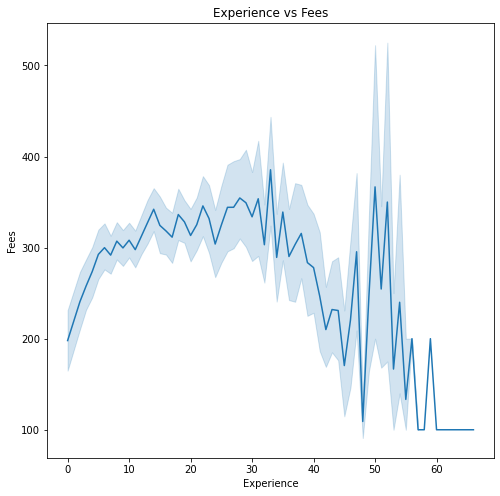

In [31]:
plt.figure(figsize=(8,8))
lx = sns.lineplot(x='Experience',y='Fees',data=ds)
lx.set_title("Experience vs Fees")
plt.show()

Key Observation: The fee is high for the doctor having experinece of 30 yrs or 50 yrs 

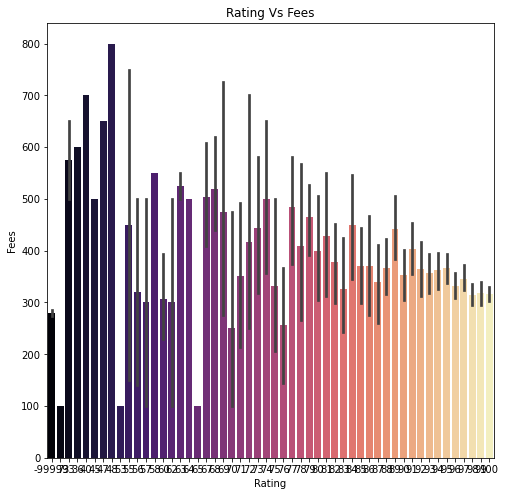

In [32]:
plt.figure(figsize=(8,8))
sns.barplot(x='Rating',y='Fees',data=ds,palette='magma')
plt.title("Rating Vs Fees")
plt.show()

Key Observation: Higher fees does't related to the high rating 

In [33]:
ds.head(5)

Experience  Rating         Profile  Fees       city  MBBS  BDS  BAMS  BHMS  \
0          24     100       Homeopath   100  Ernakulam     0    0     0     1   
1          12      98        Ayurveda   350  Bangalore     0    0     1     0   
2           9  -99999  ENT Specialist   300  Bangalore     1    0     0     0   
3          12  -99999        Ayurveda   250  Bangalore     0    0     1     0   
4          20     100        Ayurveda   250    Chennai     0    0     1     0   

   MD - Dermatology  MS - ENT  Venereology & Leprosy  MD - General Medicine  \
0                 0         0                      0                      0   
1                 0         0                      0                      0   
2                 0         0                      0                      0   
3                 0         0                      0                      0   
4                 0         0                      0                      0   

   Diploma in Otorhinolaryngology (DLO)  MD - Homeopathy  
0                                     0                1  
1                                     0                0  
2                                     0                0  
3                                     0                0  
4                                     0                0

In [34]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer
oe =  OrdinalEncoder()
for i in ds.columns:
    if ds[i].dtypes=='object':
        ds[i]=oe.fit_transform(ds[i].values.reshape(-1,1))

In [35]:
ds

Experience  Rating  Profile  Fees  city  MBBS  BDS  BAMS  BHMS  \
0             24     100      5.0   100   4.0     0    0     0     1   
1             12      98      0.0   350   0.0     0    0     1     0   
2              9  -99999      3.0   300   0.0     1    0     0     0   
3             12  -99999      0.0   250   0.0     0    0     1     0   
4             20     100      0.0   250   1.0     0    0     1     0   
...          ...     ...      ...   ...   ...   ...  ...   ...   ...   
5956          19      98      3.0   300   0.0     1    0     0     0   
5957          33  -99999      4.0   100   1.0     1    0     0     0   
5958          41      97      4.0   600   3.0     1    0     0     0   
5959          15      90      4.0   100   6.0     1    0     0     0   
5960          17     100      1.0   200   3.0     0    1     0     0   

      MD - Dermatology  MS - ENT  Venereology & Leprosy  \
0                    0         0                      0   
1                    0         0                      0   
2                    0         0                      0   
3                    0         0                      0   
4                    0         0                      0   
...                ...       ...                    ...   
5956                 0         1                      0   
5957                 0         0                      0   
5958                 0         0                      0   
5959                 0         0                      0   
5960                 0         0                      0   

      MD - General Medicine  Diploma in Otorhinolaryngology (DLO)  \
0                         0                                     0   
1                         0                                     0   
2                         0                                     0   
3                         0                                     0   
4                         0                                     0   
...                     ...                                   ...   
5956                      0                                     0   
5957                      0                                     0   
5958                      0                                     0   
5959                      1                                     0   
5960                      0                                     0   

      MD - Homeopathy  
0                   1  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
5956                0  
5957                0  
5958                0  
5959                0  
5960                0  

[5961 rows x 15 columns]

In [36]:
ds['city'].value_counts()

0.0    1258
6.0    1219
3.0    1184
5.0     951
1.0     855
2.0     228
4.0     153
8.0      86
9.0      26
7.0       1
Name: city, dtype: int64

# Finding Outliers and Skewness

Experience                                 AxesSubplot(0.125,0.125;0.0435393x0.755)
Rating                                  AxesSubplot(0.177247,0.125;0.0435393x0.755)
Profile                                 AxesSubplot(0.229494,0.125;0.0435393x0.755)
Fees                                    AxesSubplot(0.281742,0.125;0.0435393x0.755)
city                                    AxesSubplot(0.333989,0.125;0.0435393x0.755)
MBBS                                    AxesSubplot(0.386236,0.125;0.0435393x0.755)
BDS                                     AxesSubplot(0.438483,0.125;0.0435393x0.755)
BAMS                                     AxesSubplot(0.49073,0.125;0.0435393x0.755)
BHMS                                    AxesSubplot(0.542978,0.125;0.0435393x0.755)
MD - Dermatology                        AxesSubplot(0.595225,0.125;0.0435393x0.755)
MS - ENT                                AxesSubplot(0.647472,0.125;0.0435393x0.755)
Venereology & Leprosy                   AxesSubplot(0.699719,0.125;0.0435393

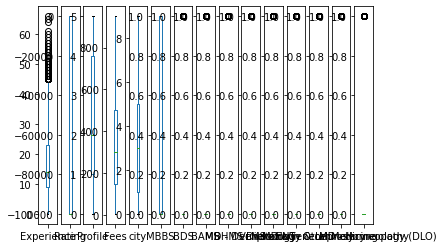

In [37]:
# Box plot for all coulmns
ds.plot(kind='box',subplots=True,layout=(1,15))

We can see there are outliers in Experience.Lets check separately.

<AxesSubplot:>

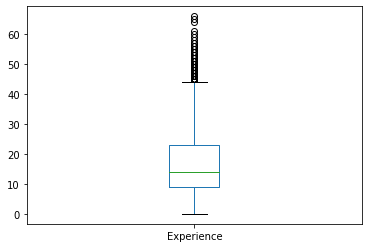

In [38]:
ds['Experience'].plot.box()

Outliers are presnent in experience column.

In [39]:
# Cheking skew.
ds.skew()

Experience                              0.991089
Rating                                  0.217056
Profile                                 0.108803
Fees                                    0.751870
city                                    0.081154
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

In [40]:
# Removing outliers
m=ds[['Experience']]

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(m))
z
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  325,  372,  901, 1009, 1111, 1860, 1981, 2023,
       2062, 2202, 2262, 2281, 2631, 3180, 3478, 3493, 3608, 3942, 3960,
       4167, 4212, 4257, 4344, 4763, 4775, 5265, 5277, 5410, 5422, 5587,
       5637, 5664, 5720, 5807, 5942], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [42]:
# lets check the presence of outlier
print('shape before remooving the outliers:',ds.shape)
dsnew=ds[(z<3).all(axis=1)]

print('shape after remooving the outliers:',dsnew.shape)
# here 38 rows will be droped

shape before remooving the outliers: (5961, 15)
shape after remooving the outliers: (5923, 15)


In [43]:
#Checkking skewness
dsnew.skew()

Experience                              0.895006
Rating                                  0.209533
Profile                                 0.119007
Fees                                    0.748357
city                                    0.079675
MBBS                                    0.130310
BDS                                     1.284958
BAMS                                    2.221059
BHMS                                    2.250679
MD - Dermatology                        2.628183
MS - ENT                                3.405438
Venereology & Leprosy                   4.156418
MD - General Medicine                   4.258789
Diploma in Otorhinolaryngology (DLO)    4.586276
MD - Homeopathy                         5.456222
dtype: float64

Keeping the skewness range +0.5/-0.5, however we are not going to remove outliers from objet type variabels and target variabel

# Test Data Set

In [55]:
dsTest.isnull().sum()

Experience                                0
Rating                                    0
Profile                                   0
Miscellaneous_Info                      834
locality                                  0
city                                      0
MBBS                                      0
BDS                                       0
BHMS                                      0
BAMS                                      0
MD - Dermatology                          0
MS - ENT                                  0
MD - General Medicine                     0
Venereology & Leprosy                     0
Diploma in Otorhinolaryngology (DLO)      0
DDVL                                      0
dtype: int64

In [44]:
# Extract Experience Year from Experience variable in numeric form
dsTest['Experience'] = dsTest['Experience'].str.split().str[0]
dsTest['Experience'] = dsTest['Experience'].astype(int)

In [45]:
# We can extract City and locality from the Place column
# Before extracting lets first treat the msiing values in Place column
dsTest.Place.fillna('Undefine,Undefine',inplace=True)

# Extracting city and location from Place
dsTest['locality'] = dsTest['Place'].str.split(",").str[0]
dsTest['city'] = dsTest['Place'].str.split(",").str[1]

#Now we can drop the place variable
dsTest.drop('Place',axis=1,inplace=True)

In [46]:
# Rating Column 
dsTest['Rating'].fillna('-99999%',inplace=True)

# replacing % into numerical values
for i in dsTest['Rating'].value_counts().index:
     dsTest['Rating'].replace(i,int(i[:-1]),inplace=True)
    

In [47]:
# Qua;ofocation Column
dsTest['Qualification_2'] = dsTest['Qualification'].apply(lambda x: len(x.split(",")))

dsTest['Qualification_2'].value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_2, dtype: int64

In [48]:
# Extract relevant qualification
# DICT of qualification with there counts
dsTest["Qualification"]=dsTest["Qualification"].str.split(",")
Qual ={}
for x in dsTest["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qual:
            Qual[each]+=1
        else:
            Qual[each]=1
            

In [49]:
#Extract top 10 qual
mt_qual = sorted(Qual.items(),key=lambda x:x[1],reverse=True)[:10]
ft_qual = []
for qual in mt_qual:
    ft_qual.append(qual[0])
    
print(ft_qual)

['MBBS', 'BDS', 'BHMS', 'BAMS', 'MD - Dermatology', 'MS - ENT', 'MD - General Medicine', 'Venereology & Leprosy', 'Diploma in Otorhinolaryngology (DLO)', 'DDVL']


In [50]:
#Encode extracted top 10 qualification into train dataset as new column.
for qual in ft_qual:
     dsTest[qual] = 0

for x,y in zip(dsTest['Qualification'].values, np.array([i for i in range(len(dsTest))])):
    for c in x:
        c = c.strip()
        if c in ft_qual:
            dsTest[c][y] = 1

In [51]:
# Now we can drop the extra quali which we added 
dsTest.drop(['Qualification','Qualification_2'],axis=1,inplace=True)

In [52]:
# remove the extra spaces
dsTest['city'] = dsTest['city'].apply(lambda x: re.sub(' +','',str(x)))

In [56]:
# droping the column locality and Miscellaneous_Info
dsTest.drop(['Miscellaneous_Info','locality'],axis=1,inplace=True)

In [57]:
#Encoding City and Profile
oe =  OrdinalEncoder()
for i in dsTest.columns:
    if dsTest[i].dtypes=='object':
        dsTest[i]=oe.fit_transform(dsTest[i].values.reshape(-1,1))

# Creating feature and target dataframe

In [58]:
x=dsnew.drop(columns=['Fees'])
y=dsnew['Fees']

In [59]:
x.shape

(5923, 14)

In [60]:
y.shape

(5923,)

In [61]:
# lets bring all feature into common scale
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [67]:
# To find the best random state using Linear Regressor model

from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best r2 score is',maxAccu,'on random state',maxRS)

best r2 score is 0.16489539817316778 on random state 139


In [68]:
# Sending the data for train and test using Train_test_Split 
# 30 % data will go for testing and 70% data will go for training the model
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4146, 14)
(1777, 14)
(4146,)
(1777,)


70% of the data (12447 rows) will be available for training the model & 30% (5335 rows) will be available for testing the model

# Model Building & Evaluation

Since the target variable as continuous values we can build the regression models. Therefore oue evalution criteria will be: Evaluation Matrics : MAE,MSE,RMSE and R2 Score

In [69]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train)

0.12027634117046138

In [70]:
lm.coef_

array([ -8.10652935,  30.42873853, -23.68289576,  -2.13493439,
        34.59085019, -35.73313154, -24.36487351,  17.65180757,
         5.33858812,  12.32995246,   1.89981617,   1.80056855,
        -6.51901746,   7.99639449])

In [71]:
lm.intercept_

308.393735312139

In [72]:
from sklearn.metrics import r2_score
pred=lm.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute arror',mean_absolute_error(y_test,pred))
print('mean squarred arror',mean_squared_error(y_test,pred))
print('Root mean square arror',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.16489539817316778
mean absolute arror 140.5970270832084
mean squarred arror 30438.596055756392
Root mean square arror 174.466604414015


In [73]:
# Decision Tree Regression Model
dc=DecisionTreeRegressor()
dc.fit(x_train,y_train)
dc.score(x_train,y_train)

0.7946479392857881

In [74]:
from sklearn.metrics import r2_score
pred=dc.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination -0.5187815470377415
mean absolute error 173.4938611535404
mean squarred error 55357.82931394358
Root mean square error 235.2824458261678


In [75]:
# KNeighbors Regression Model
kn=KNeighborsRegressor()
kn.fit(x_train,y_train)
kn.score(x_train,y_train)

0.33915182833095503

In [76]:
from sklearn.metrics import r2_score
pred=kn.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.06015544517358429
mean absolute error 141.81778277996625
mean squarred error 34256.24610016882
Root mean square error 185.08442965352006


In [77]:
# Support Vector Regressor Model
from sklearn.svm import SVR
svr=SVR(kernel='rbf')
svr.fit(x_train,y_train)
svr.score(x_train,y_train)

0.06116798570881976

In [78]:
pred=svr.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.08635671934037337
mean absolute error 141.8662788248547
mean squarred error 33301.23998624683
Root mean square error 182.4862734187063


In [79]:
# Random Forest Regression Model
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.7114062635959921

In [80]:
from sklearn.metrics import r2_score
pred=rf.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.008769339118191999
mean absolute error 145.62223540824385
mean squarred error 36129.21018356239
Root mean square error 190.07685336085083


Based on the results of above models, and capomaring the R2 score and other evalution matrics result of MAE,MSE and RMSE.We can find the Random Forest Regression model is best model to predict the . Since the Random Forest model has the second hishest score(0.71) and R2 score(0.0087) and lowest values of MAE, MSE,RMSE among other four models build above, it is the best model among the above five models

# Improving the model accuracy using cross Validation

In [85]:
from sklearn.model_selection import cross_val_score
lmscores =cross_val_score(lm,x,y,cv=5)
print(lmscores)
print(lmscores.mean(),lmscores.std())

[0.13622506 0.1126938  0.14292854 0.11879076 0.13051042]
0.128229717591057 0.011096317637979764


In [86]:
from sklearn.model_selection import cross_val_score
dcscores =cross_val_score(dc,x,y,cv=5)
print(dcscores)
print(dcscores.mean(),dcscores.std())

[-0.54932921 -0.45251356 -0.51062022 -0.51541327 -0.47847901]
-0.5012710541302088 0.03314744487346779


In [87]:
from sklearn.model_selection import cross_val_score
knnscores =cross_val_score(kn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[-0.01947109  0.02602252  0.00951184  0.06050983  0.00502509]
0.01631963663462672 0.026464347511104273


In [88]:
from sklearn.model_selection import cross_val_score
rfscores =cross_val_score(rf,x,y,cv=5)
print(rfscores)
print(rfscores.mean(),rfscores.std())

[-0.0574936   0.01194946  0.01291106  0.02321484 -0.00415336]
-0.002714319038582791 0.02875531500483523


In [89]:
from sklearn.model_selection import cross_val_score
svrscores =cross_val_score(svr,x,y,cv=5)
print(svrscores)
print(svrscores.mean(),svrscores.std())

[ 0.00932507 -0.01853059 -0.00970978 -0.02690572 -0.00854388]
-0.01087297931672675 0.01208657645493392


# HyperParameter Tuning

In [122]:
from sklearn.model_selection import GridSearchCV 
parameter={'max_depth':np.arange(20,30),'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}

In [123]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)

In [124]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': array([20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [130]:
GCV.best_params_

{'criterion': 'mae', 'max_depth': 20, 'max_features': 'log2'}

In [132]:
rf_final=RandomForestRegressor(criterion= 'mse', max_depth= 30, max_features= 'log2')
rf_final.fit(x_train,y_train)
rf_final.score(x_train,y_train)

0.7102481301232647

In [133]:
from sklearn.metrics import r2_score
pred=rf_final.predict(x_test)
print('Coefficient of determination',r2_score(y_test,pred))
print('mean absolute error',mean_absolute_error(y_test,pred))
print('mean squarred error',mean_squared_error(y_test,pred))
print('Root mean square error',np.sqrt(mean_squared_error(y_test,pred)))

Coefficient of determination 0.0093767373117426
mean absolute error 144.90570630098335
mean squarred error 36107.07122250525
Root mean square error 190.01860756911478


# Saving the best Model

Lets save the best model "Random Forest Regression Model

In [134]:
import joblib
joblib.dump(rf_final,'Model_DoctorFees.obj')

['Model_DoctorFees.obj']

# Predict the test data with the final model

In [143]:
#After that we are going to turn that into a dataframe.
#Then we will produce a 'sample_submission.csv'

y_pred_fee=rf_final.predict(dsTest)

In [144]:
# Rounding off decimal values
def rounding(x):
    m=(x//50)*50
    if m==x:
        return int(x/1.0)
    elif x-m>=25.0:
        return int((m+50)/1.0)
    else:
        return int(m/1.0)

In [145]:
# Predicting the fee 
y_fin=[]
for i in range(len(y_pred_fee)):
    y_fin.append(rounding(y_pred_fee[i]))
y_fin=pd.DataFrame({'id':np.arange(1,len(y_fin)+1,1),'Fees':y_fin})
print(y_fin.head())

   id  Fees
0   1   300
1   2   300
2   3   250
3   4   200
4   5   400


In [146]:
y_fin.to_csv('final_submission_fee.csv',index=False)